# 5. Getting started with pandas

>##<u>Contents</u>

>###1. Series

>###2. DataFrame

In [2]:
from pandas import Series, DataFrame
import pandas as pd

from numpy.random import randn
import numpy as np

from IPython.display import Image

* pandas는 NumPy 기반에서 개발되어 NumPy를 사용하는 애플리케이션에서 쉽게 사용할 수 있다.

## 5.1 Introduction to pandas data structures

### 5.1.1 Series

* Series
  1. 1차원 배열 같은 자료 구조
  2. 고정 길이의 정렬된 사전형(p164, korean edition)
    * index: values

#### 5.1.1.1 Series의 간단한 예제

In [20]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

#### 5.1.1.2 value 보기

In [5]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

#### 5.1.1.3 index 보기

In [6]:
obj.index

Int64Index([0, 1, 2, 3], dtype='int64')

#### 5.1.1.4 To create a Series with an index

In [31]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [32]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [33]:
obj2.index

Index([u'd', u'b', u'a', u'c'], dtype='object')

In [34]:
obj2.values

array([ 4,  7, -5,  3], dtype=int64)

#### 5.1.1.5 Series 객체의 추가, 수정, 삭제, 선택

##### 1) 선택

In [44]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [35]:
obj2['a']

-5

In [36]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    4
dtype: int64

##### 2) 수정

In [37]:
obj2['d'] = 6

In [38]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

###### index 라벨 수정은 이렇게

In [78]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [45]:
obj

0    4
1    7
2   -5
3    3
d    6
dtype: int64

##### 3) 추가

In [41]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [42]:
obj['d'] = 6

In [43]:
obj

0    4
1    7
2   -5
3    3
d    6
dtype: int64

##### 4) 삭제

In [21]:
del obj['d']

In [22]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

>###### 첨언: Python 사전형 객체에서는 여러 개 선택이 안된다.

In [7]:
dica = {'a':1, 'b':2, 'c':3, 'd':4}
dica

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [8]:
dica['a']

1

In [21]:
dica['a', 'b']

KeyError: ('a', 'b')

#### 5.1.1.6 Filter, 배열 연산

##### 1) Filter

In [46]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [47]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [26]:
obj2[obj2>=6]

d    6
b    7
dtype: int64

In [27]:
obj2[obj2==6]

d    6
dtype: int64

##### 2) 배열 연산

###### 첨언: Series의 연산은 개별 항목 레벨이다.

In [28]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [32]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

#### 5.1.1.7 Series 객체에서 항목유무 검사 using 'in'

###### 첨언: 'in'은 Python 문법, return value = T/F

* key-based

In [34]:
'b' in obj2

True

In [35]:
'e' in obj2

False

#### 5.1.1.8 From dict To Series 객체로의 변환

In [48]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [49]:
obj3 = Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

##### list 자료형을 index에 사용할수도 있다~

In [50]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)

In [44]:
obj4

California      NaN
Ohio          35000
Oregon        16000
Texas         71000
dtype: float64

#### 5.1.1.9 누락된 데이터 검사

* 누락된 데이터 처리 방법은 끝 부분에서 자세히 살펴봄(책 p203을 참고하기 바랍니다.)
* isnull(), notnull() 메서드 모두 T/F 반환

In [51]:
obj4

California      NaN
Ohio          35000
Oregon        16000
Texas         71000
dtype: float64

In [45]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [46]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [47]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

#### 5.1.1.10 다른 Index 간 데이터의 산술 연산

In [52]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [53]:
obj4

California      NaN
Ohio          35000
Oregon        16000
Texas         71000
dtype: float64

In [54]:
# 어느 한 개라도 없는 항목은 NaN
obj3 + obj4

California       NaN
Ohio           70000
Oregon         32000
Texas         142000
Utah             NaN
dtype: float64

#### 5.1.1.11 name 속성

In [55]:
obj4

California      NaN
Ohio          35000
Oregon        16000
Texas         71000
dtype: float64

In [58]:
obj4.name = 'population' # column name b'cuz of 1 d array
obj4.index.name = 'state'
obj4

state
California      NaN
Ohio          35000
Oregon        16000
Texas         71000
Name: population, dtype: float64

---

### 5.1.2 DataFrame

* 표 같은 스프레드시트 형식의 자료 구조이다.
* 각 칼럼은 서로 다른 종류의 값(숫자, 문자열, 불리언 등)을 담을 수 있다.
* 2차원 형식으로 저장된다.

#### 5.1.2.1 DataFrame 객체만드는 방법

##### 1) Dict = {Column: [Value1, Value2,....]}

In [59]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [60]:
frame = DataFrame(data)

In [61]:
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


##### 2) nested-dict = {Column: {Row1: Value1, Row2: Value2, ....}}

* 밖에 있는 Key: 컬럼
* 안에 있는 Key: 로우

In [4]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2001: 1.7, 2002: 3.6, 2000: 1.5}}

In [5]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


##### 3) index 지정하여 생성

**p171**

In [158]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


##### 4) Slicing 이용

**p171**

In [6]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [7]:
frame3['Ohio']

2000    1.5
2001    1.7
2002    3.6
Name: Ohio, dtype: float64

In [9]:
frame3['Ohio'][:-1]

2000    1.5
2001    1.7
Name: Ohio, dtype: float64

In [10]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}

In [11]:
DataFrame(pdata)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7


**DataFrame 객체 생성 시 인자값으로 사용할 수 있는 자료형은 아래와 같다. (p172)**

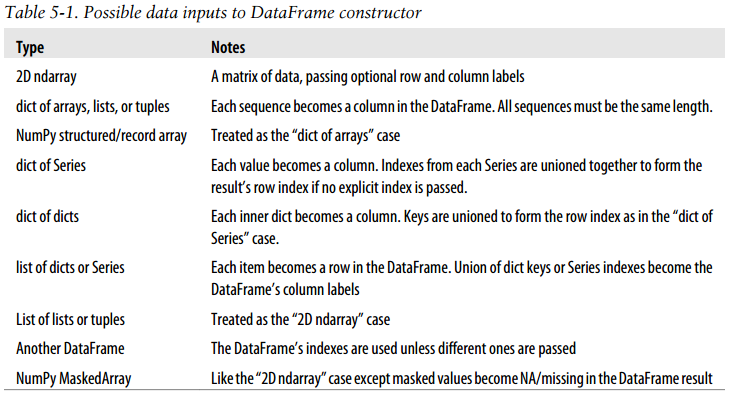

In [162]:
from IPython.display import Image
Image(filename='images/ch05_possible_data_inputs_to_data_frame_constructor.png')

#### 5.1.2.2 column, index를 명시적으로 지정

In [15]:
DataFrame(data, columns=['year', 'state', 'pop'])

NameError: name 'data' is not defined

In [14]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])

NameError: name 'data' is not defined

In [91]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [92]:
frame2.columns

Index([u'year', u'state', u'pop', u'debt'], dtype='object')

In [93]:
frame2.index

Index([u'one', u'two', u'three', u'four', u'five'], dtype='object')

#### 5.1.2.3 컬럼 접근

##### 1) 사전 형식

In [68]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

##### 2) 속성 형식

In [69]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

#### 5.1.2.4 Row(index) 접근

In [78]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [70]:
frame2.ix['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [80]:
# key error
# frame2.ix['year']

###### Series도 ix method 가능~

In [16]:
a =  Series(['a','b','c','d'])
a

0    a
1    b
2    c
3    d
dtype: object

In [17]:
a.ix[0]

'a'

#### 5.1.2.5 값 대입

##### 1) 스칼라 값

In [84]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [86]:
frame2['debt']['one']

16.5

In [88]:
# Key Error
# frame2['one']['debt']

##### 2) 배열 값

* 배열이나 리스트를 컬럼에 대입할 때는 DataFrame의 크기와 같아야 한다.

In [92]:
np.random.rand(5.)

array([ 0.56589023,  0.91563549,  0.20013366,  0.44492732,  0.70256238])

In [89]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [102]:
frame2['debt'] = np.arange(5)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4


##### 3) Series 값

In [20]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [22]:
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [23]:
frame2['debt'] = val
frame2

NameError: name 'frame2' is not defined

#### 5.1.2.6 컬럼의 생성과 삭제

##### 1) 컬럼 생성

In [24]:
frame2['eastern'] = frame2.state == 'Ohio'

NameError: name 'frame2' is not defined

In [97]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


##### 2) 컬럼 삭제

In [135]:
del frame2['eastern']

In [136]:
frame2

,year,state,pop,debt
one,2000,Seoul,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


#### 5.1.2.7 행/열 치환

In [32]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [31]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [37]:
frame3.transpose()

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html

```
 |  T
 |      Transpose index and columns
 |
 |  transpose(self)
 |      Transpose index and columns
```

#### 5.1.2.8 name

In [39]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [107]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [108]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [110]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [111]:
frame2.values

array([[2000L, 'Ohio', 1.5, nan, True],
       [2001L, 'Ohio', 1.7, -1.2, True],
       [2002L, 'Ohio', 3.6, nan, True],
       [2001L, 'Nevada', 2.4, -1.5, False],
       [2002L, 'Nevada', 2.9, -1.7, False]], dtype=object)

* DataFrame의 컬럼에 서로 다른 dtype이 있다면 모든 컬럼을 수용하기 위해 그 컬럼 배열의 dtype이 선택된다.

### 5.1.3 Index objects

#### 5.1.3.1 index 객체 생성 기본

In [41]:
range(3)

[0, 1, 2]

In [40]:
obj = Series(range(3), index=['a', 'b', 'c'])
obj

a    0
b    1
c    2
dtype: int64

In [44]:
obj.index

Index([u'a', u'b', u'c'], dtype='object')

In [45]:
index=obj.index
index

Index([u'a', u'b', u'c'], dtype='object')

In [46]:
index[1:]

Index([u'b', u'c'], dtype='object')

#### 5.1.3.2 index 객체는 수정 불가

In [47]:
index[1] = 'd'

TypeError: '<class 'pandas.core.index.Index'>' does not support mutable operations.

#### 5.1.3.3 Index Objects

* 수정할 수 없으므로 자료 구조 사이에서 안전하게 공유, 아래는 index 객체와의 비교

In [49]:
index = pd.Index(np.arange(3))

In [50]:
index

Int64Index([0, 1, 2], dtype='int64')

In [118]:
obj2 = Series([1.5, -2.5, 0], index=index)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [119]:
obj2.index

Int64Index([0, 1, 2], dtype='int64')

In [120]:
# Index 객체와의 비교
obj2.index is index

True

**pandas 내장 index class**

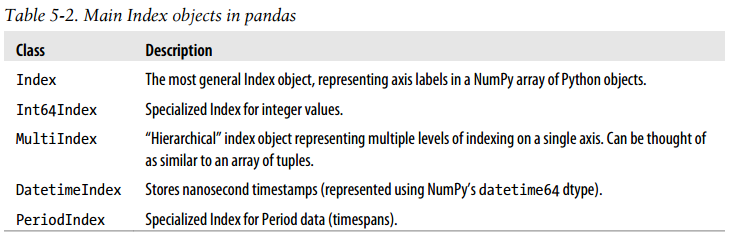

In [194]:
Image(filename='images/ch05_main_index_objects_in_pandas.png')

#### 5.1.3.4 index methods and properties

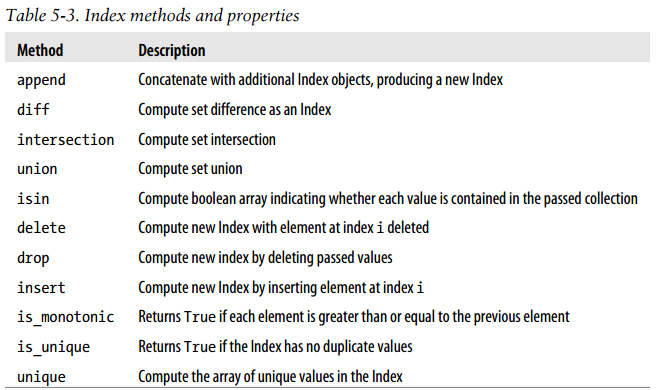

In [208]:
Image(filename='images/ch05_index_methods_and_properties.png')

In [51]:
index

Int64Index([0, 1, 2], dtype='int64')

In [53]:
index = pd.Index(['a','b','c'])

In [54]:
index

Index([u'a', u'b', u'c'], dtype='object')

In [56]:
index.drop('a')

Index([u'b', u'c'], dtype='object')

In [55]:
index.drop(2)

ValueError: labels [2] not contained in axis

In [57]:
index.is_unique

True

In [134]:
index

Int64Index([0, 1, 2], dtype='int64')

## 5.2 Essential functionality

1. Series
2. DataFrame

### 5.2.1 Reindexing

#### 5.2.1.1 Series Reindexing 기본

In [3]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [6]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

* value가 달라진 게 아니라 index 순서를 정렬시킨 것

#### 5.2.1.2 Series Reindexing에서 NaN처리

##### 1) fill_value

In [7]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

##### 2) method='ffill'

In [58]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [59]:
obj3 = Series([np.nan, 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')

0       NaN
1       NaN
2    purple
3    purple
4    yellow
5    yellow
dtype: object

##### 3) reindex method option

인자|설명
:---:|:---:
ffill or pad|앞의 값으로 채워 넣는다.
bfill or backfill|뒤의 값으로 채워 넣는다.

#### 5.2.1.3 DataFrame Reindexing 기본

##### 1) index(row)에 대한 reindex

In [60]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [138]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0,1,2
b,NaN,NaN,NaN
c,3,4,5
d,6,7,8


##### 2) column에 대한 reindex

In [63]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


##### 3) index,column 동시에 reindex

In [143]:
frame.reindex(index=['a', 'b', 'c', 'd'], columns=states)

,Texas,Utah,California
a,1,NaN,2
b,NaN,NaN,NaN
c,4,NaN,5
d,7,NaN,8


> **Quiz!**

> **NaN 값을 앞의 값으로 채워 넣은 DataFrame을 만들어보세요.**

In [66]:
frame.reindex(index=['a','b','c','d'], method='pad')

,Ohio,Texas,California
a,0,1,2
b,0,1,2
c,3,4,5
d,6,7,8


##### 4) ix method로 좀 더 간결하게 reindex

In [68]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [69]:
frame.ix['a']

Ohio          0
Texas         1
California    2
Name: a, dtype: int32

In [70]:
frame.ix[['a','b','c','d']]

,Ohio,Texas,California
a,0,1,2
b,NaN,NaN,NaN
c,3,4,5
d,6,7,8


In [71]:
frame.ix[['a', 'b', 'c', 'd'], states]

,Texas,Utah,California
a,1,NaN,2
b,NaN,NaN,NaN
c,4,NaN,5
d,7,NaN,8


##### 5) reindex function arguments

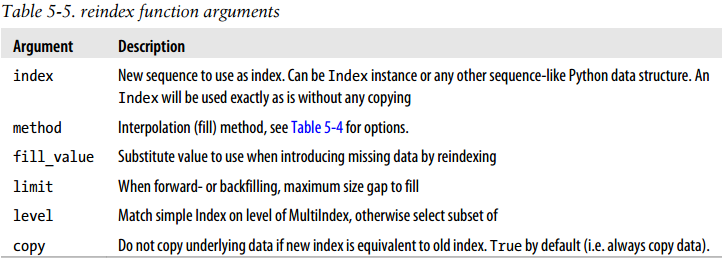

In [81]:
Image(filename='images/ch05_reindex_function_arguments.png')

### 5.2.2 Dropping entries from an axis - 하나의 로우 or 컬럼 삭제

#### 5.2.2.1 Series에서 item 삭제

In [72]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0
b    1
c    2
d    3
e    4
dtype: float64

In [73]:
del obj['c']

In [74]:
obj

a    0
b    1
d    3
e    4
dtype: float64

In [171]:
new_obj = obj.drop('c')
new_obj

a    0
b    1
d    3
e    4
dtype: float64

In [33]:
obj

a    0
b    1
c    2
d    3
e    4
dtype: float64

In [31]:
obj.drop(['d', 'c'])

a    0
b    1
e    4
dtype: float64

#### 5.2.2.2 DataFrame에 대한 삭제

In [75]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [175]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [176]:
data.drop(['Colorado', 'Ohio'], axis=0)

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [182]:
# axis=1이 없으면 에러
data.drop('two',  axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [77]:
data.columns.name = 'num'

In [88]:
data.drop('Utah', axis='rows')

num,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,12,13,14,15


In [85]:
data.drop('two', axis='columns')

num,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [78]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [183]:
# axis의 기본값은 0
help(data.drop)

Help on method drop in module pandas.core.generic:

drop(self, labels, axis=0, level=None, inplace=False, **kwargs) method of pandas.core.frame.DataFrame instance
    Return new object with labels in requested axis removed
    
    Parameters
    ----------
    labels : single label or list-like
    axis : int or axis name
    level : int or level name, default None
        For MultiIndex
    inplace : bool, default False
        If True, do operation inplace and return None.
    
    Returns
    -------
    dropped : type of caller



### 5.2.3 Indexing, selection, and filtering

#### 5.2.3.1 Series Indexing

In [89]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [84]:
obj

a    0
b    1
c    2
d    3
dtype: float64

##### 1) 라벨 이름으로 indexing 가능

In [83]:
obj['b']

1.0

In [87]:
obj[['b', 'a', 'd']]

b    1
a    0
d    3
dtype: float64

##### 2) 인덱스 번호로 indexing 가능

In [85]:
obj[1]

1.0

In [90]:
obj[[1, 3]]

b    1
d    3
dtype: float64

#### 5.2.3.2 Series Slicing

##### 1) 인덱스 번호로 Slicing 가능

In [90]:
obj

a    0
b    1
c    2
d    3
dtype: float64

In [91]:
obj[2:4]

c    2
d    3
dtype: float64

##### 2) 라벨 이름으로 Slicing 가능

In [88]:
obj['b':'c']

b    1
c    2
dtype: float64

#### 5.2.3.3 Series Filtering

In [93]:
# value-base
obj[obj < 2]

a    0
b    1
dtype: float64

#### 5.2.3.4 Series 값 대입

In [94]:
obj['b':'c'] = 5

In [95]:
obj

a    0
b    5
c    5
d    3
dtype: float64

#### 5.2.3.5 DataFrame Indexing

In [92]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [97]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [98]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [99]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


#### 5.2.3.6 DataFrame Filtering

In [93]:
data['three']

Ohio         2
Colorado     6
Utah        10
New York    14
Name: three, dtype: int32

In [94]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [95]:
# return value: T/F
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


> **Quiz!!**

> **data에서 데이터가 10 이하(미만 아님)인 것만 보여주되 NaN은 0처리해서 보여주세요.**

#### 5.2.3.7 값 대입

In [103]:
data[data < 5] = 0

In [104]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### 5.2.3.8 ix 메서드 이용하여 선택하기

In [105]:
data.ix['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [190]:
# 컬럼에 인덱스 번호로 주는 것도 가능!!
data.ix[['Colorado', 'Utah'], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


In [108]:
# column
data.ix[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [109]:
data.ix[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [110]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [191]:
data.ix[data.three>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [97]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [96]:
data.ix[data.three > 5, :3]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


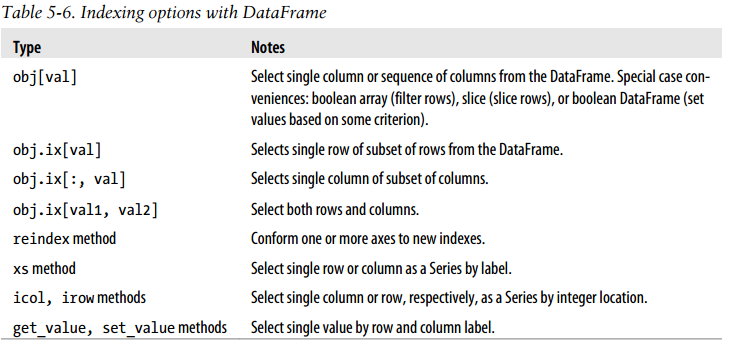

In [112]:
Image(filename='images/ch05_indexing_options_with_dataframe.png')

### 5.2.4 Arithmetic and data alignment

#### 5.2.4.1 산술연산 기본(Series간, DataFrame간 데이터를 더해보자!)

In [3]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [4]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [5]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [6]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

**"어느 한 쪽이라도 없으면 NaN(Not a Number)"**

In [7]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0,1,2
Texas,3,4,5
Colorado,6,7,8


In [8]:
df2

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [99]:
df1 + df2

NameError: name 'df1' is not defined

#### 5.2.4.2 Arithmetic methods with fill values

In [10]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df1

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [11]:
df2

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [12]:
df1 + df2

,a,b,c,d,e
0,0,2,4,6,NaN
1,9,11,13,15,NaN
2,18,20,22,24,NaN
3,NaN,NaN,NaN,NaN,NaN


In [13]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0,2,4,6,4
1,9,11,13,15,9
2,18,20,22,24,14
3,15,16,17,18,19


In [15]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0,1,2,3,0
1,4,5,6,7,0
2,8,9,10,11,0


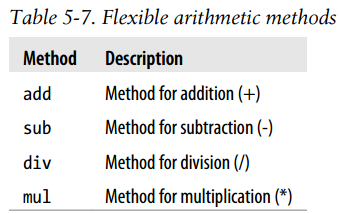

In [16]:
Image(filename='images/ch05_flexible_arithmetic_methods.png')

#### 5.2.4.3 Operations between DataFrame and Series

##### 1) array

In [17]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [18]:
arr[0]

array([ 0.,  1.,  2.,  3.])

In [19]:
arr - arr[0]

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

##### 2) DataFrame and Series

In [20]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.ix[0]
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [21]:
series

b    0
d    1
e    2
Name: Utah, dtype: float64

In [22]:
frame - series

,b,d,e
Utah,0,0,0
Ohio,3,3,3
Texas,6,6,6
Oregon,9,9,9


In [23]:
series2 = Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [24]:
frame + series2

,b,d,e,f
Utah,0,NaN,3,NaN
Ohio,3,NaN,6,NaN
Texas,6,NaN,9,NaN
Oregon,9,NaN,12,NaN


In [25]:
frame['d']

Utah       1
Ohio       4
Texas      7
Oregon    10
Name: d, dtype: float64

In [27]:
series3 = frame['d']

In [30]:
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [28]:
series3

Utah       1
Ohio       4
Texas      7
Oregon    10
Name: d, dtype: float64

* **axis=0: column-wise**
* **axis=1: row-wise**

In [32]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1,0,1
Ohio,-1,0,1
Texas,-1,0,1
Oregon,-1,0,1


### 5.2.5 Function application and mapping

#### 5.2.5.1 pandas 객체에도 NumPy의 Universal Function 적용 가능

> **NumPy의 Universal Function이 뭐였나요?**

In [34]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [42]:
frame

,b,d,e
Utah,0.541419,-1.807154,-0.563238
Ohio,0.405983,-0.168057,-0.818397
Texas,1.130585,0.676200,-1.651476
Oregon,0.812232,0.739676,-0.009728


In [41]:
np.abs(frame)

,b,d,e
Utah,0.541419,1.807154,0.563238
Ohio,0.405983,0.168057,0.818397
Texas,1.130585,0.676200,1.651476
Oregon,0.812232,0.739676,0.009728


#### 5.2.5.2 함수 적용 (apply 메소드 이용)

**lambda expression**

* function 이름을 할당하지 않는다.
    * that's why it is called ananymous function
* 형식
    * *lambda argument1, argument2,... argumentN : expression using arguments*
* lambda is an expression, not a statement.
* lambda’s body is a single expression, not a block of statements.
* examples
    * f = lambda x, y , z : x+y+z
        * f(2,3,4)
    * x = (lambda a="fee", b="fie", c="foe": a+b+c)
        * x("aaa", "bbb")

##### 1) 1차원 배열

In [43]:
frame

,b,d,e
Utah,0.541419,-1.807154,-0.563238
Ohio,0.405983,-0.168057,-0.818397
Texas,1.130585,0.676200,-1.651476
Oregon,0.812232,0.739676,-0.009728


In [37]:
f = lambda x: x.max() - x.min()

In [38]:
frame.apply(f)

b    0.724602
d    2.546831
e    1.641747
dtype: float64

* 0.724602: b 컬럼의 최대값 1.130585 에서 최소값 0.405983을 뺀 값

In [39]:
frame.apply(f, axis=1)

Utah      2.348573
Ohio      1.224380
Texas     2.782060
Oregon    0.821960
dtype: float64

* 2.348573: Utah 열에서 최대값 0.541419에서 최소값 -1.807154를 뺀 값(0.541419 - (-1.807154))

##### 2) Series

In [44]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,0.405983,-1.807154,-1.651476
max,1.130585,0.739676,-0.009728


##### 3) 파이썬 함수 (applymap-치환적용)

In [100]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


**DataFrame**

In [45]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.54,-1.81,-0.56
Ohio,0.41,-0.17,-0.82
Texas,1.13,0.68,-1.65
Oregon,0.81,0.74,-0.01


**Series**

In [46]:
frame['e'].map(format)

Utah      -0.56
Ohio      -0.82
Texas     -1.65
Oregon    -0.01
Name: e, dtype: object

### 5.2.6 Sorting and ranking

1. Sorting
    1. Label-based sorting
        1. Series - sort_index()
        2. DataFrame - sort_index()
    2. Value-based sorting
        1. Series - order()
        2. DataFrame - sort_index(by='')
2. Ranking
    1. Series
    2. DataFrame

#### 5.2.6.1 Series의 label-based sorting

In [193]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])

In [194]:
obj

d    0
a    1
b    2
c    3
dtype: int64

In [195]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [196]:
obj = Series(np.arange(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int32

#### 5.2.6.2 DataFrame의 label-based sorting

In [200]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [201]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [202]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [203]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


> **Quiz!!!**

> x축, y축 모두 descending으로 정렬시키려면?

#### 5.2.6.3 Series의 value-based sorting

In [70]:
obj = Series([4, 7, -3, 2])
obj.order()

2   -3
3    2
0    4
1    7
dtype: int64

In [71]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])
obj.order()

4    -3
5     2
0     4
2     7
1   NaN
3   NaN
dtype: float64

> **Quiz!!!**

> value 기준에서 내림차순으로 정렬하려면?

#### 5.2.6.4 DataFrame의 value-based sorting

In [72]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [73]:
frame.sort_index(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [74]:
frame.sort_index(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


> **Quiz!!!**

> 위 frame을 a 기준으로 내림차순 정렬하려면?

#### 5.2.6.5 Series ranking

* 순위를 매긴다.
* numpy.argsort에서 반환하는 간접 정렬 색인과 유사한데, 동률인 순위를 처리하는 방식이 다르다.
* 동점인 항목에 대해서는 평균 순위를 매긴다.

In [77]:
obj = Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [78]:
obj.rank(method='first')

0    6
1    1
2    7
3    4
4    3
5    2
6    5
dtype: float64

In [82]:
obj.rank(ascending=False, method='max')

0    2
1    7
2    2
3    4
4    5
5    6
6    4
dtype: float64

In [83]:
obj.rank(ascending=False)

0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64

http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.rank.html

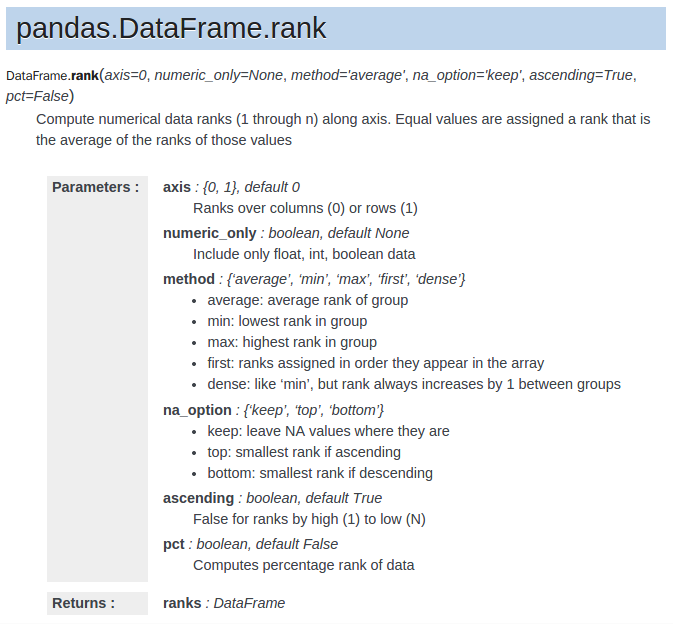

In [81]:
Image(filename='images/ch05_pandas_dataframe_rank.png')

#### 5.2.6.6 DataFrame ranking

In [84]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                   'c': [-2, 5, 8, -2.5]})
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [85]:
frame.rank(axis=1)

,a,b,c
0,2,3,1
1,1,3,2
2,2,1,3
3,2,3,1


In [88]:
frame.rank()

,a,b,c
0,1.5,3,2
1,3.5,4,3
2,1.5,1,4
3,3.5,2,1


### 5.2.7 Axis indexes with duplicate values

### 5.2.7.1 중복 여부 체크 (is_unique)

In [89]:
obj = Series(range(5), index=['a','a','b','b','c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [90]:
obj.index.is_unique

False

In [91]:
obj['a']

a    0
a    1
dtype: int64

In [92]:
obj['c']

4

In [93]:
df = DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.110915,1.051978,-0.649353
a,0.609093,-0.701755,-0.238609
b,0.691453,-1.238147,0.352682
b,0.489897,0.116578,1.871693


In [94]:
df.ix['b']

,0,1,2
b,0.691453,-1.238147,0.352682
b,0.489897,0.116578,1.871693


In [95]:
df.index.is_unique

False

## 5.3 Summarizing and computing descriptive statistics

### pandas는 누락된 값을 제외하도록 설계

#### 1) sum()

In [5]:
# Not A Number
np.nan

nan

In [3]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
                [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [6]:
# column
df.sum()

one    9.25
two   -5.80
dtype: float64

In [7]:
# row
df.sum(axis=1)

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

* 누락된 값이 a, c행에 있는데 제외하고 값을 합산시킴

#### 2) mean()

In [9]:
df.mean(axis=1, skipna=True)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [10]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

* skipna option: True by default, NaN값을 skip하고 계산

#### 3) idxmax, idxmin()

* 각 컬럼에서 어떤 인덱스가 max or min인지

In [11]:
df.idxmax()

one    b
two    d
dtype: object

In [12]:
df.idxmin()

one    d
two    b
dtype: object

#### 4) cumsum()

```
cumsum = sum(self, axis=None, dtype=None, out=None, skipna=True, **kwargs)
 |      Return cumulative sum over requested axis.
 |      
 |      Parameters
 |      ----------
 |      axis : {index (0), columns (1)}
 |      skipna : boolean, default True
 |          Exclude NA/null values. If an entire row/column is NA, the result
 |          will be NA
 |      
 |      Returns
 |      -------
 |      sum : Series
 ```

In [20]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [17]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [21]:
# column-wise
df.cumsum(axis=0)

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [19]:
# row-wise
df.cumsum(axis=1)

,one,two
a,1.40,NaN
b,7.10,2.60
c,NaN,NaN
d,0.75,-0.55


#### 6) describe()

```
 |  describe(self, percentile_width=None, percentiles=None, include=None, exclude=None)
 |      Generate various summary statistics, excluding NaN values.
 |      
 |      Parameters
 |      ----------
 |      percentile_width : float, deprecated
 |          The ``percentile_width`` argument will be removed in a future
 |          version. Use ``percentiles`` instead.
 |          width of the desired uncertainty interval, default is 50,
 |          which corresponds to lower=25, upper=75
 |      percentiles : array-like, optional
 |          The percentiles to include in the output. Should all
 |          be in the interval [0, 1]. By default `percentiles` is
 |          [.25, .5, .75], returning the 25th, 50th, and 75th percentiles.
 |      include, exclude : list-like, 'all', or None (default)
 |          Specify the form of the returned result. Either:
 |      
 |          - None to both (default). The result will include only numeric-typed
 |            columns or, if none are, only categorical columns.
 |          - A list of dtypes or strings to be included/excluded.
 |            To select all numeric types use numpy numpy.number. To select
 |            categorical objects use type object. See also the select_dtypes
 |            documentation. eg. df.describe(include=['O'])
 |          - If include is the string 'all', the output column-set will
 |            match the input one.
 |      
 |      Returns
 |      -------
 |      summary: NDFrame of summary statistics
 |      
 |      Notes
 |      -----
 |      The output DataFrame index depends on the requested dtypes:
 |      
 |      For numeric dtypes, it will include: count, mean, std, min,
 |      max, and lower, 50, and upper percentiles.
 |      
 |      For object dtypes (e.g. timestamps or strings), the index
 |      will include the count, unique, most common, and frequency of the
 |      most common. Timestamps also include the first and last items.
 |      
 |      For mixed dtypes, the index will be the union of the corresponding
 |      output types. Non-applicable entries will be filled with NaN.
 |      Note that mixed-dtype outputs can only be returned from mixed-dtype
 |      inputs and appropriate use of the include/exclude arguments.
 |      
 |      If multiple values have the highest count, then the
 |      `count` and `most common` pair will be arbitrarily chosen from
 |      among those with the highest count.
 |      
 |      The include, exclude arguments are ignored for Series.
```

In [22]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [24]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [25]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### 5.3.1 Correlation and covariance - 상관관계와 공분산

1. 상관관계
    * http://terms.naver.com/entry.nhn?docId=2073705&cid=47324&categoryId=47324
2. 공분산
    * http://terms.naver.com/entry.nhn?docId=1063348&cid=40942&categoryId=32215
    * http://blog.naver.com/ikek21/220003173213

#### 5.3.1.1 Yahoo! Finance에서 구한 주식 가격과 시간 총액 구하기

In [30]:
import pandas.io.data as web

In [32]:
help(web)

Help on module pandas.io.data in pandas.io:

NAME
    pandas.io.data - Module contains tools for collecting data from various remote sources

FILE
    /home/kwangyounjung/.virtualenvs/pydal/lib/python2.7/site-packages/pandas/io/data.py

CLASSES
    __builtin__.object
        Options
    exceptions.IOError(exceptions.EnvironmentError)
        RemoteDataError(pandas.core.common.PandasError, exceptions.IOError)
    exceptions.UserWarning(exceptions.Warning)
        SymbolWarning
    pandas.core.common.PandasError(exceptions.Exception)
        RemoteDataError(pandas.core.common.PandasError, exceptions.IOError)
    
    class Options(__builtin__.object)
     |  ***Experimental***
     |  This class fetches call/put data for a given stock/expiry month.
     |  
     |  It is instantiated with a string representing the ticker symbol.
     |  
     |  The class has the following methods:
     |      get_options_data:(month, year, expiry)
     |      get_call_data:(month, year, expiry)
     |  

In [31]:
all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = web.get_data_yahoo(ticker)

In [40]:
# {ticker: DataFrame}
all_data

{'AAPL':               Open    High     Low   Close     Volume  Adj Close
 Date                                                            
 2010-01-04  213.43  214.50  212.38  214.01  123432400      28.84
 2010-01-05  214.60  215.59  213.25  214.38  150476200      28.89
 2010-01-06  214.38  215.23  210.75  210.97  138040000      28.43
 2010-01-07  211.75  212.00  209.05  210.58  119282800      28.38
 2010-01-08  210.30  212.00  209.06  211.98  111902700      28.56
 2010-01-11  212.80  213.00  208.45  210.11  115557400      28.31
 2010-01-12  209.19  209.77  206.42  207.72  148614900      27.99
 2010-01-13  207.87  210.93  204.10  210.65  151473000      28.39
 2010-01-14  210.11  210.46  209.02  209.43  108223500      28.22
 2010-01-15  210.93  211.60  205.87  205.93  148516900      27.75
 2010-01-19  208.33  215.19  207.24  215.04  182501900      28.98
 2010-01-20  214.91  215.55  209.50  211.73  153038200      28.53
 2010-01-21  212.08  213.31  207.21  208.07  152038600      28.04
 2

In [46]:
price = DataFrame(
    {
        tic: data['Adj Close'] for tic, data in all_data.iteritems()
    }
)

In [44]:
volume = DataFrame(
    {
        tic: data['Volume'] for tic, data in all_data.iteritems()
    }
)

In [56]:
price.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2015-04-01,124.25,542.56,159.18,40.72
2015-04-02,125.32,535.53,160.45,40.29
2015-04-06,127.35,536.77,162.04,41.55
2015-04-07,126.01,537.02,162.07,41.53
2015-04-08,125.60,541.61,161.85,41.42


#### 5.3.1.2 percent change

In [64]:
returns = price.pct_change()

In [65]:
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2015-04-01,-0.001447,-0.009927,-0.008224,0.001476
2015-04-02,0.008612,-0.012957,0.007978,-0.010560
2015-04-06,0.016199,0.002315,0.009910,0.031273
2015-04-07,-0.010522,0.000466,0.000185,-0.000481
2015-04-08,-0.003254,0.008547,-0.001357,-0.002649


In [62]:
# AAPL, 2015-04-07
(127.35-126.01)/127.35

0.010522182960345421

In [63]:
# AAPL, 2015-04-08
(126.01-125.6)/126.01

0.003253710023014132

#### 5.3.1.3 Correlation

In [67]:
returns.MSFT.tail()

Date
2015-04-01    0.001476
2015-04-02   -0.010560
2015-04-06    0.031273
2015-04-07   -0.000481
2015-04-08   -0.002649
Name: MSFT, dtype: float64

In [68]:
returns.MSFT.corr(returns.IBM)

0.50105638348617265

* 최대값 1을 기준으로 얼마나 상관있는지 수치화

In [77]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.270667,0.371821,0.347856
GOOG,0.270667,1.000000,0.312961,0.414646
IBM,0.371821,0.312961,1.000000,0.501056
MSFT,0.347856,0.414646,0.501056,1.000000


In [78]:
returns.corrwith(returns.IBM)

AAPL    0.371821
GOOG    0.312961
IBM     1.000000
MSFT    0.501056
dtype: float64

**퍼센트 변화율과 시가 총액의 상관관계 분석**

In [83]:
volume.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2015-04-01,40359200,1947600,3687800,36752000
2015-04-02,32120700,1708400,4651500,37451600
2015-04-06,36881400,1316900,3457200,39083900
2015-04-07,34820100,1298000,3142800,28758500
2015-04-08,37193100,1170400,2514500,24603400


In [81]:
returns.corrwith(volume)

AAPL   -0.097757
GOOG   -0.083388
IBM    -0.184717
MSFT   -0.119982
dtype: float64

#### 5.3.1.4 Covariance

* 두 가지 변수가 변하는 정도를 수치화(양, 음)

In [69]:
returns.MSFT.cov(returns.IBM)

8.3312970791258394e-05

In [84]:
returns.GOOG.cov(returns.AAPL)

5.1442774017836417e-05

In [86]:
returns.GOOG.cov(returns.IBM)

4.7409799078419488e-05

In [87]:
returns.GOOG.cov(returns.MSFT)

7.3753050283210331e-05

In [71]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000282,0.000051,0.000073,0.000083
GOOG,0.000051,0.000179,0.000047,0.000074
IBM,0.000073,0.000047,0.000138,0.000083
MSFT,0.000083,0.000074,0.000083,0.000200


### 5.3.2 Unique values, value counts, and membership

#### 5.3.2.1 unique()

In [90]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [92]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

#### 5.3.2.2 value_counts()

In [93]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [98]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

* 도수 계산, 내림차순 정렬 by default

In [104]:
pd.value_counts(obj.values, sort=False)

a    3
c    3
b    2
d    1
dtype: int64

#### 5.3.2.3 isin()

* 반환값은 T/F

In [107]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [105]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

##### mask로 filtering

In [106]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

* mask에서 True값인 것만 가지고옴

#### 5.3.2.3 DataFrame에서 value_counts

In [108]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [122]:
# 각 행이 컬럼에 따라 몇개가 있는지
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1,1,1
2,0,2,1
3,2,2,0
4,2,0,2
5,0,0,1


In [124]:
# 1차원 array만 가능
# pd.value_counts(data.values)

---

## Handling missing data

In [ ]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

In [ ]:
string_data.isnull()

In [ ]:
string_data[0] = None
string_data.isnull()

### Filtering out missing data

In [ ]:
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna()

In [ ]:
data[data.notnull()]

In [ ]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                  [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

In [ ]:
cleaned

In [ ]:
data.dropna(how='all')

In [ ]:
data[4] = NA
data

In [ ]:
data.dropna(axis=1, how='all')

In [ ]:
df = DataFrame(np.random.randn(7, 3))
df.ix[:4, 1] = NA; df.ix[:2, 2] = NA
df

In [ ]:
df.dropna(thresh=3)

### Filling in missing data

In [ ]:
df.fillna(0)

In [ ]:
df.fillna({1: 0.5, 3: -1})

In [ ]:
# always returns a reference to the filled object
_ = df.fillna(0, inplace=True)
df

In [ ]:
df = DataFrame(np.random.randn(6, 3))
df.ix[2:, 1] = NA; df.ix[4:, 2] = NA
df

In [ ]:
df.fillna(method='ffill')

In [ ]:
df.fillna(method='ffill', limit=2)

In [ ]:
data = Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

## Hierarchical indexing

In [ ]:
data = Series(np.random.randn(10),
              index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                     [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

In [ ]:
data.index

In [ ]:
data['b']

In [ ]:
data['b':'c']

In [ ]:
data.ix[['b', 'd']]

In [ ]:
data[:, 2]

In [ ]:
data.unstack()

In [ ]:
data.unstack().stack()

In [ ]:
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])
frame

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

In [ ]:
frame['Ohio']

### Reordering and sorting levels

In [ ]:
frame.swaplevel('key1', 'key2')

In [ ]:
frame.sortlevel(1)

In [ ]:
frame.swaplevel(0, 1).sortlevel(0)

### Summary statistics by level

In [ ]:
frame.sum(level='key2')

In [ ]:
frame.sum(level='color', axis=1)

### Using a DataFrame's columns

In [ ]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})
frame

In [ ]:
frame2 = frame.set_index(['c', 'd'])
frame2

In [ ]:
frame.set_index(['c', 'd'], drop=False)

In [ ]:
frame2.reset_index()

## Other pandas topics

### Integer indexing

In [ ]:
ser = Series(np.arange(3.))
ser.iloc[-1]

In [ ]:
ser

In [ ]:
ser2 = Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

In [ ]:
ser.ix[:1]

In [ ]:
ser3 = Series(range(3), index=[-5, 1, 3])
ser3.iloc[2]

In [ ]:
frame = DataFrame(np.arange(6).reshape((3, 2)), index=[2, 0, 1])
frame.iloc[0]

### Panel data

In [ ]:
import pandas.io.data as web

pdata = pd.Panel(dict((stk, web.get_data_yahoo(stk))
                       for stk in ['AAPL', 'GOOG', 'MSFT', 'DELL']))

In [ ]:
pdata

In [ ]:
pdata = pdata.swapaxes('items', 'minor')
pdata['Adj Close']

In [ ]:
pdata.ix[:, '6/1/2012', :]

In [ ]:
pdata.ix['Adj Close', '5/22/2012':, :]

In [ ]:
stacked = pdata.ix[:, '5/30/2012':, :].to_frame()
stacked

In [ ]:
stacked.to_panel()